In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [2]:
df=pd.read_csv('my_movies.csv')

In [3]:
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
df.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [5]:
df=pd.get_dummies(df)

In [6]:
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


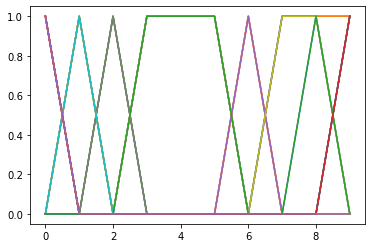

In [14]:
import matplotlib.pyplot as plt
plt.plot(df)

(array([[4., 0., 0., 0., 0., 0., 0., 0., 0., 6.],
        [3., 0., 0., 0., 0., 0., 0., 0., 0., 7.],
        [8., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
        [8., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
        [4., 0., 0., 0., 0., 0., 0., 0., 0., 6.],
        [8., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [8., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
        [4., 0., 0., 0., 0., 0., 0., 0., 0., 6.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [8., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [4., 0., 0., 0., 0., 0., 0., 0., 0., 6.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 1.],


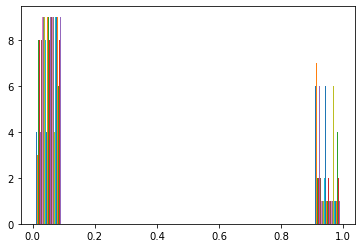

In [15]:
plt.hist(df)

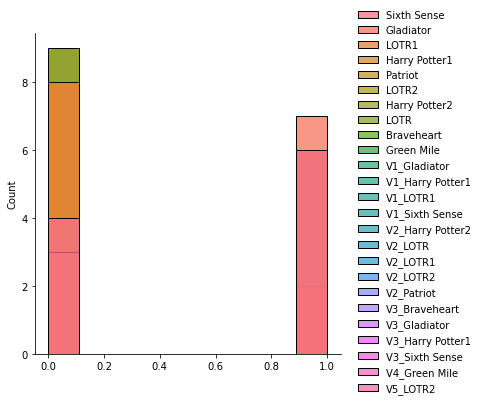

In [17]:
import seaborn as sns


sns.displot(df)

In [7]:
df.isna().sum()

Sixth Sense         0
Gladiator           0
LOTR1               0
Harry Potter1       0
Patriot             0
LOTR2               0
Harry Potter2       0
LOTR                0
Braveheart          0
Green Mile          0
V1_Gladiator        0
V1_Harry Potter1    0
V1_LOTR1            0
V1_Sixth Sense      0
V2_Harry Potter2    0
V2_LOTR             0
V2_LOTR1            0
V2_LOTR2            0
V2_Patriot          0
V3_Braveheart       0
V3_Gladiator        0
V3_Harry Potter1    0
V3_Sixth Sense      0
V4_Green Mile       0
V5_LOTR2            0
dtype: int64

In [8]:
df_freq=apriori(df,min_support=0.01,use_colnames=True)

In [9]:
df_freq

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Harry Potter1, LOTR1, V1_Sixth Sense, V3_Harr..."
1393,0.1,"(LOTR2, LOTR1, V1_Sixth Sense, V3_Harry Potter..."
1394,0.1,"(Harry Potter1, LOTR2, V1_Sixth Sense, V3_Harr..."
1395,0.1,"(Harry Potter1, LOTR2, LOTR1, V1_Sixth Sense, ..."


In [10]:
rules=association_rules(df_freq,metric="lift",min_threshold=0.7)

In [11]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(Green Mile),"(Harry Potter1, LOTR2, LOTR1, V1_Sixth Sense, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V5_LOTR2),"(Harry Potter1, LOTR2, LOTR1, V1_Sixth Sense, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(V4_Green Mile),"(Harry Potter1, LOTR2, LOTR1, V1_Sixth Sense, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(Sixth Sense),"(Harry Potter1, LOTR2, LOTR1, V1_Sixth Sense, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [12]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Harry Potter1, V5_LOTR2, V3_Harry Potter1, Gr...","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42207,"(V1_Sixth Sense, Harry Potter1, V5_LOTR2, V2_L...","(LOTR1, LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42195,"(V1_Sixth Sense, Harry Potter1, LOTR2, Green M...","(LOTR1, V5_LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42196,"(V1_Sixth Sense, Harry Potter1, LOTR2, V2_LOTR1)","(LOTR1, V5_LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42197,"(Harry Potter1, V5_LOTR2, LOTR2, Green Mile)","(LOTR1, V1_Sixth Sense, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42198,"(Harry Potter1, V5_LOTR2, LOTR2, V2_LOTR1)","(LOTR1, V1_Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42199,"(V2_LOTR1, Harry Potter1, LOTR2, Green Mile)","(LOTR1, V1_Sixth Sense, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42200,"(LOTR1, V1_Sixth Sense, Harry Potter1, V5_LOTR2)","(LOTR2, Green Mile, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42201,"(LOTR1, V1_Sixth Sense, Harry Potter1, Green M...","(LOTR2, V5_LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42202,"(LOTR1, V1_Sixth Sense, Harry Potter1, V2_LOTR1)","(LOTR2, V5_LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [13]:
rules[rules.lift>1].head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
107,(Patriot),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.80
108,(LOTR2),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
109,(Green Mile),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
110,(V1_LOTR1),(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


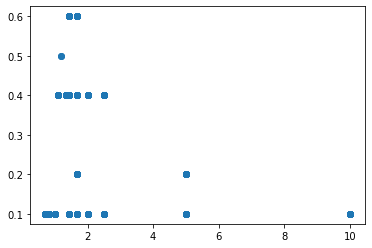

In [18]:
plt.scatter(x=rules['lift'],y=rules['support'])

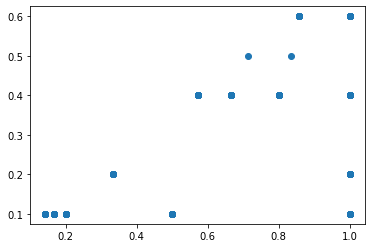

In [19]:
plt.scatter(x=rules['confidence'],y=rules['support'])